In [1]:
import pylab
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import wave
import sys
from scipy import signal
import librosa , librosa.display
from scipy.io.wavfile import read
from tqdm import tqdm

In [11]:
sampFreq, sound = wf.read('Xe.wav')
f = 16e3
window_size = 20 / 1000
window_n_samples = window_size * f

N = int(window_n_samples)
K = 320

In [12]:
length_in_s = sound.shape[0] / sampFreq
print(length_in_s)

0.8049375


In [18]:
time = np.arange(sound.shape[0]) / sound.shape[0] * length_in_s
time.shape

(12879,)

In [3]:
def R(arr, N, k):
    s = 0
    for i in range(0, N-k):
        s += arr[i] * arr[i+k]
    return s

def R_arr(arr, N, K):
    R_list = []
    for k in range(0, K+1):
        R_list.append(R(arr, N, k))
    return R_list

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12000\1876932496.py:4: RuntimeWarning: overflow encountered in short_scalars
  s += arr[i] * arr[i+k]


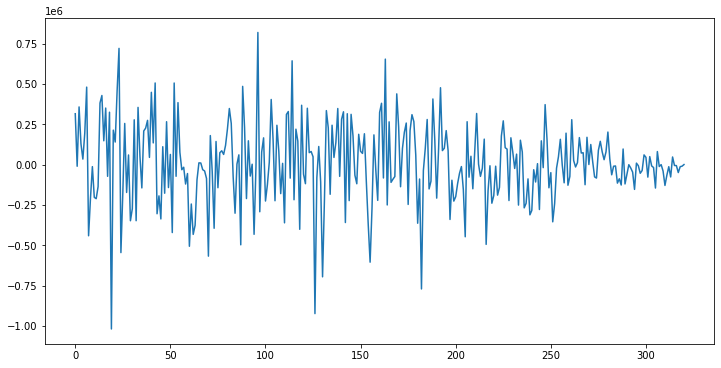

In [4]:
input = sound[5000:5000+N]
R_list = R_arr(input, N, K)
plt.figure(figsize=(12,6))
plt.plot(R_list)
plt.show()

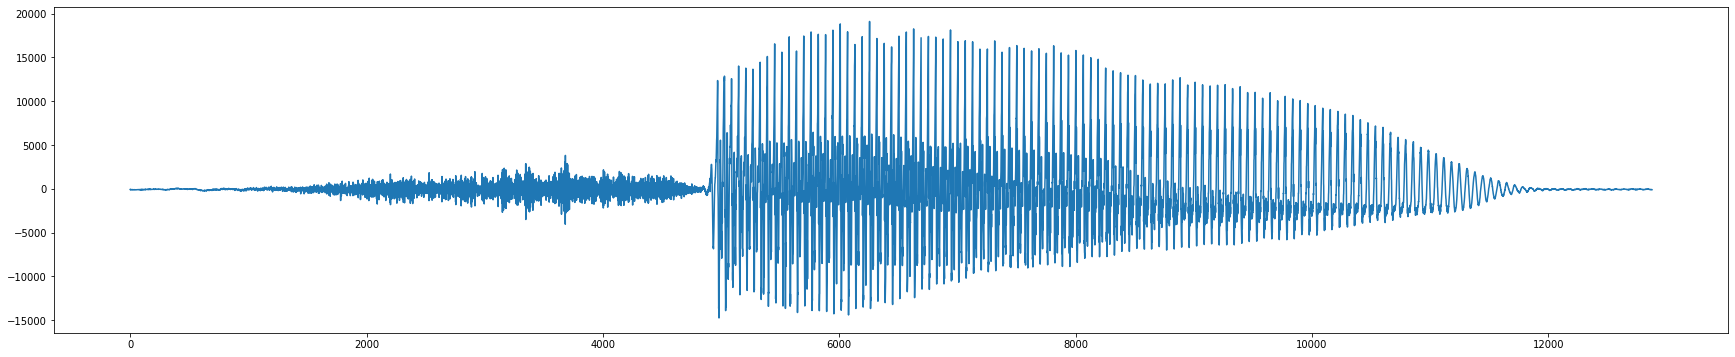

In [17]:
plt.figure(figsize=(30,6))
plt.plot(sound)
plt.show()

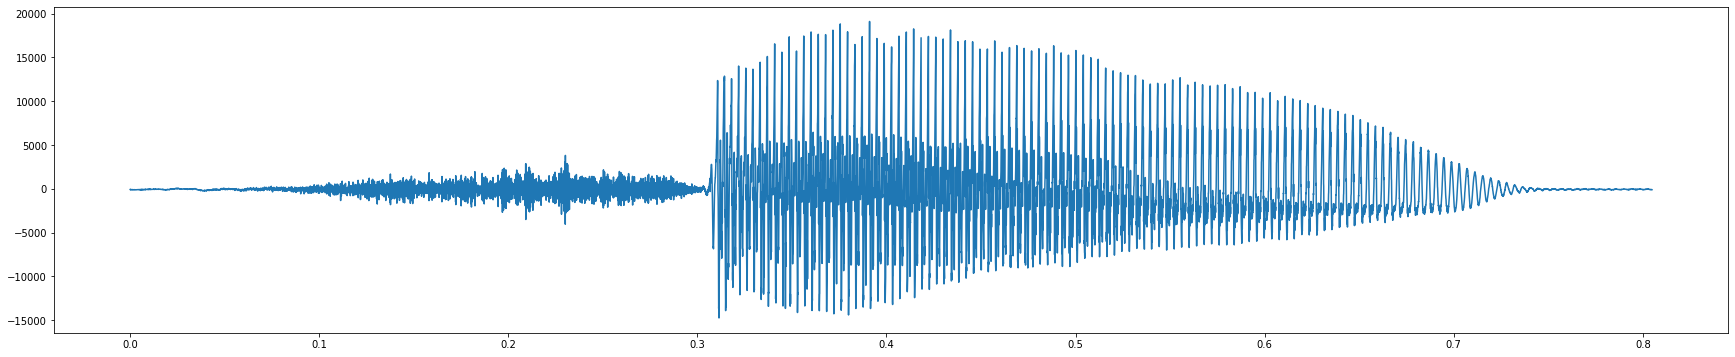

In [19]:
plt.figure(figsize=(30,6))
plt.plot(time, sound)
plt.show()

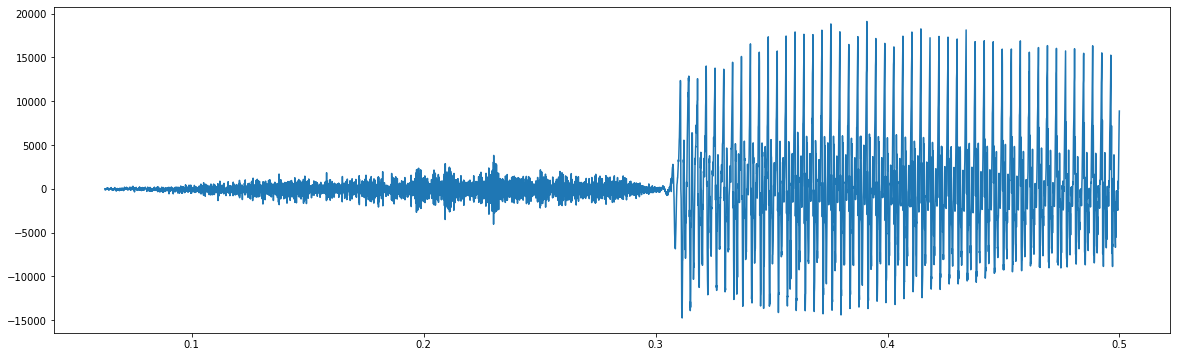

In [27]:
start, end = 1000, 8000
plt.figure(figsize=(20,6))
plt.plot(time[start:end], sound[start:end])
plt.show()

In [34]:
wav_data, sr = librosa.load('Xe.wav', sr=8000, mono=True)

In [35]:
f0 = librosa.yin(wav_data, sr = 8000, fmin = librosa.note_to_hz('C2'), fmax= librosa.note_to_hz('C7'))
print(f0.shape)

(13,)


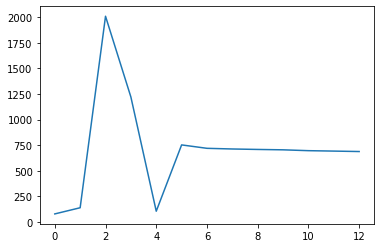

In [32]:
plt.plot(f0)